# Data Analysis for a New Movie Studio Venture

Students names: Charity Mwangangi, Keith Tongi, Edna Maina, Jacob Abuon, Edgar Muturi, Kevin Karanja  
Student pace: Part time/Remote  
Scheduled project review date/time: 12/06/2025 7pm   
Instructor name: Maryann Mwikali  

## Business Understanding
Stakeholder: The head of the company's new movie studio

### Business Problem

Our client is exploring an entry into the movie production industry but lacks insider knowledge about what drives box office success. Box office refers explicitly to theatre ticket sales. To make informed decisions, we need to identify the key characteristics of financially successful films.

### Project's value:
This analysis reveals which movie genres deliver significantly higher returns on investment (ROI), providing valuable insights for the company’s new movie studio. By identifying the most profitable genres, the company can make data-driven decisions about which types of films to produce, maximizing revenue potential while minimizing financial risk. This evidence-based approach offers a competitive advantage over studios that rely on intuition, ensuring that production budgets are invested in content with the highest likelihood of success.


### Project Goal

This analysis aims to explore historical box office data alongside movie attributes such as genre, ratings, and release trends to uncover patterns associated with higher revenue. Based on our findings, we will present three actionable business recommendations to guide the client’s movie production strategy.

### Objectives:  
We are looking to answer the following research questions:
1. Genre trends: Which genres are most profitable?
2. Runtime, Ratings, and Revenue: Is there a correlation between rating or length and revenue?
3. Release Seasons(quarters 1, 2, 3, or 4): Which months do movies do best? 
4. Do movies with different content ratings have significantly different average ROI?  
5. What is the impact of talent (actors, actresses, directors) on revenue generated?



## 1. Data Understanding

### Data Source: 
We use three main datasets:

- Box Office Mojo (bom.movie_gross.csv.gz): Contains domestic gross revenue, production studio, release year, and movie titles.

- IMDB Dataset (im.db SQLite file): Includes detailed movie metadata from movie_basics (title, genre, runtime) and movie_ratings (average rating, number of votes).

- TN Movie Budgets Dataset (tn.movie_budgets.csv): Contains data on movie budgets, domestic and worldwide gross, and release dates.

These datasets will be cleaned and merged to create a unified dataset for analysis.

### Data Properties:
It includes key variables such as:
* Genres, directors, writers, actors, release dates, and production companies
* Revenue, budget, ratings, runtime, and awards

### Data Utility
These variables allow us to:
* Identify which combinations of genres, talent, and production features tend to correlate with higher box office returns.
* Explore trends over time, such as whether certain genres are becoming more popular or profitable.
* Offer comparative insights between domestic and worldwide markets.

### Data Limitations
* The data sources have differing movie titles which result in the loss of some entries when we merge the three datasets chosen for analysis
* Movies with missing values will not factor in the analysis after being dropped and this won't reflect the true nature of the data

### 1.1 Importing necessary libraries

In [1]:
import pandas as pd
import sqlite3
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from scipy.stats import pearsonr

### 1.2 Loading datasets

In [2]:
# Loading BOM dataset
bom_df = pd.read_csv('bom.movie_gross.csv')

# Loading IMBD dataset
conn = sqlite3.connect('im.db')

# Loading TN dataset
tn_df = pd.read_csv('tn.movie_budgets.csv')

### 1.3 Exploratory Data Analysis


In [3]:
# BOM dataset
bom_df.info()
bom_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [4]:
#view all tables in IMDB database
query = "SELECT name FROM sqlite_master WHERE type='table';"
tables = pd.read_sql(query, conn)
print(tables)

            name
0   movie_basics
1      directors
2      known_for
3     movie_akas
4  movie_ratings
5        persons
6     principals
7        writers


In [5]:
# IMDB Movie basics dataset
basics_df = pd.read_sql(""" 
    SELECT * FROM movie_basics
""", conn)
basics_df

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


In [6]:
#get data type of basics_df and non-null count
basics_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [7]:
# IMDB movie ratings dataset
ratings_df = pd.read_sql("""
    SELECT * FROM movie_ratings
""", conn)
ratings_df

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


In [8]:
#get data type of ratings_df and non-null count
ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movie_id       73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [9]:
# TN Movie budgets dataset
tn_df = pd.read_csv('tn.movie_budgets.csv')
tn_df

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [10]:
#get data type of tn columns and non-null count
tn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


## 2. Data Preparation
## 2.1 Data Cleaning

### For the Box office csv dataset and IMDB basics_df table we are dropping the null values, to prepare the data for analysis.

In [11]:
#dropping null values in box office movie dataset
bom_df = bom_df.dropna()
bom_df
bom_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2007 entries, 0 to 3353
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           2007 non-null   object 
 1   studio          2007 non-null   object 
 2   domestic_gross  2007 non-null   float64
 3   foreign_gross   2007 non-null   object 
 4   year            2007 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 94.1+ KB


In [12]:
#dropping null values in basics table from IMDB Database
basics_df = basics_df.dropna()
basics_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112232 entries, 0 to 146139
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         112232 non-null  object 
 1   primary_title    112232 non-null  object 
 2   original_title   112232 non-null  object 
 3   start_year       112232 non-null  int64  
 4   runtime_minutes  112232 non-null  float64
 5   genres           112232 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.0+ MB


In [13]:
#show total of missing values from both tables
print(ratings_df.isnull().sum())
print(basics_df.isnull().sum())

movie_id         0
averagerating    0
numvotes         0
dtype: int64
movie_id           0
primary_title      0
original_title     0
start_year         0
runtime_minutes    0
genres             0
dtype: int64


## 2.2 Data Wrangling

### Create a unified movies_df table using inner join with basics_df and ratings_df for easier analysis.


In [14]:
#merging on 'movie_id' which is similar in both tables
movies_df = pd.merge(basics_df, ratings_df, on = "movie_id", how = "inner")
movies_df

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119
4,tt0137204,Joe Finds Grace,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy",8.1,263
...,...,...,...,...,...,...,...,...
65715,tt9911774,Padmavyuhathile Abhimanyu,Padmavyuhathile Abhimanyu,2019,130.0,Drama,8.4,365
65716,tt9913056,Swarm Season,Swarm Season,2019,86.0,Documentary,6.2,5
65717,tt9913084,Diabolik sono io,Diabolik sono io,2019,75.0,Documentary,6.2,6
65718,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,98.0,"Drama,Family",8.7,136


In [15]:
#visualize new unified columns, their datatypes and non-null values
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65720 entries, 0 to 65719
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         65720 non-null  object 
 1   primary_title    65720 non-null  object 
 2   original_title   65720 non-null  object 
 3   start_year       65720 non-null  int64  
 4   runtime_minutes  65720 non-null  float64
 5   genres           65720 non-null  object 
 6   averagerating    65720 non-null  float64
 7   numvotes         65720 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 4.5+ MB


To accurately merge datasets from different sources (IMDb, Box Office Mojo, TN_Movie_Budgets), we need a common key — the movie title. However, title formatting often varies across datasets due to differences in capitalization, punctuation, and whitespace.

In this step, we:

* Convert all titles to lowercase

* Strip any leading or trailing whitespace

* This standardization allows for more accurate joins between datasets on title and release year.

In [16]:
#Standardize the titles
movies_df['original_title'] = movies_df['original_title'].str.lower().str.strip()
bom_df['title'] = bom_df['title'].str.lower().str.strip()
tn_df['movie'] = tn_df['movie'].str.lower().str.strip()


In [17]:
#Merge Box Office with IMDB (inner join on titles)
bom_imdb_df = pd.merge(
    bom_df, 
    movies_df, 
    left_on='title', 
    right_on='original_title', 
    how='inner'  # or 'left' if you want to keep all from BOM
)
bom_imdb_df.head()


,title,studio,domestic_gross,foreign_gross,year,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,toy story 3,BV,415000000.0,652000000,2010,tt0435761,Toy Story 3,toy story 3,2010,103.0,"Adventure,Animation,Comedy",8.3,682218
1,inception,WB,292600000.0,535700000,2010,tt1375666,Inception,inception,2010,148.0,"Action,Adventure,Sci-Fi",8.8,1841066
2,shrek forever after,P/DW,238700000.0,513900000,2010,tt0892791,Shrek Forever After,shrek forever after,2010,93.0,"Adventure,Animation,Comedy",6.3,167532
3,the twilight saga: eclipse,Sum.,300500000.0,398000000,2010,tt1325004,The Twilight Saga: Eclipse,the twilight saga: eclipse,2010,124.0,"Adventure,Drama,Fantasy",5.0,211733
4,iron man 2,Par.,312400000.0,311500000,2010,tt1228705,Iron Man 2,iron man 2,2010,124.0,"Action,Adventure,Sci-Fi",7.0,657690


In [18]:
#Merge with TN movie budgets
full_df = pd.merge(
    bom_imdb_df, 
    tn_df, 
    left_on='title', 
    right_on='movie', 
    how='inner'  
)
full_df
full_df.info() #see the full_df columns


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1176 entries, 0 to 1175
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              1176 non-null   object 
 1   studio             1176 non-null   object 
 2   domestic_gross_x   1176 non-null   float64
 3   foreign_gross      1176 non-null   object 
 4   year               1176 non-null   int64  
 5   movie_id           1176 non-null   object 
 6   primary_title      1176 non-null   object 
 7   original_title     1176 non-null   object 
 8   start_year         1176 non-null   int64  
 9   runtime_minutes    1176 non-null   float64
 10  genres             1176 non-null   object 
 11  averagerating      1176 non-null   float64
 12  numvotes           1176 non-null   int64  
 13  id                 1176 non-null   int64  
 14  release_date       1176 non-null   object 
 15  movie              1176 non-null   object 
 16  production_budget  1176 

#### To analyze impact of talent on revenue:
Using the IMDB ERD provided, join the persons, principals, and movie_basics table to obtain information on the people in the film, their professions, and movies they were in.

In [19]:
#SQL query to join the three tables
talent_df = pd.read_sql(""" 
    SELECT 
    p.person_id,
    p.primary_name,
    p.primary_profession,
    pr.category,
    mb.movie_id,
    mb.original_title,
    mb.runtime_minutes,
    mb.genres,
    mr.averagerating
FROM persons p
JOIN principals pr ON p.person_id = pr.person_id
JOIN movie_basics mb ON pr.movie_id = mb.movie_id
JOIN movie_ratings mr ON mb.movie_id = mr.movie_id
WHERE p.death_year IS NULL;
""", conn)

talent_df

,person_id,primary_name,primary_profession,category,movie_id,original_title,runtime_minutes,genres,averagerating
0,nm0061671,Mary Ellen Bauder,"miscellaneous,production_manager,producer",producer,tt2398241,Smurfs: The Lost Village,90.0,"Adventure,Animation,Comedy",6.0
1,nm0061865,Joseph Bauer,"composer,music_department,sound_department",composer,tt0433397,Satin,84.0,"Comedy,Drama,Music",4.7
2,nm0061865,Joseph Bauer,"composer,music_department,sound_department",composer,tt1681372,Caesar and Otto's Deadly Xmas,83.0,"Comedy,Horror",4.0
3,nm0061865,Joseph Bauer,"composer,music_department,sound_department",composer,tt2281215,Elf-Man,86.0,"Comedy,Family,Fantasy",3.6
4,nm0061865,Joseph Bauer,"composer,music_department,sound_department",composer,tt2387710,Journey to the Forbidden Valley,96.0,"Action,Adventure,Family",5.4
...,...,...,...,...,...,...,...,...,...
621361,nm9989145,Szilvia Herr,actress,actress,tt8723836,Remélem legközelebb sikerül meghalnod:),96.0,"Comedy,Drama,Thriller",7.6
621362,nm9989840,Mariya Shekaturova,actor,actor,tt5953804,Diggery,80.0,Horror,3.8
621363,nm9990381,Susan Grobes,actress,actress,tt6527982,Choices,NaN,Drama,8.2
621364,nm9990690,Joo Yeon So,actress,actress,tt8737130,Sodak Sodak,91.0,Horror,4.6


To reduce the number of entries and repetitions in the profession category, drop duplicates and empty/Nan rows

In [20]:
talent_df.drop_duplicates(subset = "primary_name", inplace = True) #drop duplicates
talent_df.reset_index(drop = True) #reset the dataframe index to start at 0 and drop the old indexing column
talent_df.dropna(inplace =True) #drop empty rows with no information
talent_df


,person_id,primary_name,primary_profession,category,movie_id,original_title,runtime_minutes,genres,averagerating
0,nm0061671,Mary Ellen Bauder,"miscellaneous,production_manager,producer",producer,tt2398241,Smurfs: The Lost Village,90.0,"Adventure,Animation,Comedy",6.0
1,nm0061865,Joseph Bauer,"composer,music_department,sound_department",composer,tt0433397,Satin,84.0,"Comedy,Drama,Music",4.7
7,nm0062195,Axel Baumann,"camera_department,cinematographer,art_department",cinematographer,tt2547632,The Only Real Game,82.0,"Documentary,Sport",7.3
10,nm0062798,Pete Baxter,"production_designer,art_department,set_decorator",production_designer,tt2178256,The Rocket,96.0,Drama,7.3
11,nm0062879,Ruel S. Bayani,"director,production_manager,miscellaneous",director,tt1592569,Paano na kaya,110.0,"Drama,Romance",6.4
...,...,...,...,...,...,...,...,...,...
621360,nm9983906,Alejandro Odom,actor,actor,tt8722030,Hush Little Baby Welcome To The Family,55.0,Horror,1.7
621361,nm9989145,Szilvia Herr,actress,actress,tt8723836,Remélem legközelebb sikerül meghalnod:),96.0,"Comedy,Drama,Thriller",7.6
621362,nm9989840,Mariya Shekaturova,actor,actor,tt5953804,Diggery,80.0,Horror,3.8
621364,nm9990690,Joo Yeon So,actress,actress,tt8737130,Sodak Sodak,91.0,Horror,4.6


Title formatting often varies across datasets due to differences in capitalization, punctuation, and whitespace.

Therefore standardize the actors and TN dataframes before merging them to:

* Convert all titles to lowercase

* Strip any leading or trailing whitespace

* Allow for more accurate joins between datasets on movie titles

In [21]:
#standardize the titles or columns to be merged on
talent_df['original_title'] = talent_df['original_title'].str.lower().str.strip()
tn_df['movie'] = tn_df['movie'].str.lower().str.strip()


#Merge talent_df with TN movie budgets
talent_revenue_df = pd.merge( 
    tn_df,
    talent_df, 
    left_on='movie', 
    right_on='original_title', 
    how='inner'  
)
talent_revenue_df


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,person_id,primary_name,primary_profession,category,movie_id,original_title,runtime_minutes,genres,averagerating
0,2,"May 20, 2011",pirates of the caribbean: on stranger tides,"$410,600,000","$241,063,875","$1,045,663,875",nm0938684,Jay Wolpert,"producer,writer,miscellaneous",writer,tt1298650,pirates of the caribbean: on stranger tides,136.0,"Action,Adventure,Fantasy",6.6
1,2,"May 20, 2011",pirates of the caribbean: on stranger tides,"$410,600,000","$241,063,875","$1,045,663,875",nm0064181,Stuart Beattie,"writer,director,producer",writer,tt1298650,pirates of the caribbean: on stranger tides,136.0,"Action,Adventure,Fantasy",6.6
2,2,"May 20, 2011",pirates of the caribbean: on stranger tides,"$410,600,000","$241,063,875","$1,045,663,875",nm0551128,Rob Marshall,"director,miscellaneous,producer",director,tt1298650,pirates of the caribbean: on stranger tides,136.0,"Action,Adventure,Fantasy",6.6
3,2,"May 20, 2011",pirates of the caribbean: on stranger tides,"$410,600,000","$241,063,875","$1,045,663,875",nm0694627,Tim Powers,"writer,actor",writer,tt1298650,pirates of the caribbean: on stranger tides,136.0,"Action,Adventure,Fantasy",6.6
4,2,"May 20, 2011",pirates of the caribbean: on stranger tides,"$410,600,000","$241,063,875","$1,045,663,875",nm0004851,Penélope Cruz,"actress,soundtrack,producer",actress,tt1298650,pirates of the caribbean: on stranger tides,136.0,"Action,Adventure,Fantasy",6.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10292,81,"Sep 29, 2015",a plague so pleasant,"$1,400",$0,$0,nm5497357,Maxwell Moody,actor,actor,tt2107644,a plague so pleasant,76.0,"Drama,Horror,Thriller",5.4
10293,81,"Sep 29, 2015",a plague so pleasant,"$1,400",$0,$0,nm4572412,Eva Boehnke,actress,actress,tt2107644,a plague so pleasant,76.0,"Drama,Horror,Thriller",5.4
10294,81,"Sep 29, 2015",a plague so pleasant,"$1,400",$0,$0,nm4767160,David Chandler,actor,actor,tt2107644,a plague so pleasant,76.0,"Drama,Horror,Thriller",5.4
10295,81,"Sep 29, 2015",a plague so pleasant,"$1,400",$0,$0,nm4766951,Benjamin Roberds,"camera_department,director,writer",director,tt2107644,a plague so pleasant,76.0,"Drama,Horror,Thriller",5.4


Create 3 dataframes for actors, actresses, and directors since they are the most influential or easily recognizable figures in movie-making.    
Save them as copies to avoid issues when creating visualizations.

In [22]:
actors_df = talent_revenue_df[talent_revenue_df["category"] == "actor"].copy()
actresses_df = talent_revenue_df[talent_revenue_df["category"] == "actress"].copy()
director_df = talent_revenue_df[talent_revenue_df["category"] == "director"].copy()

### Selecting relevant columns for analysing research questions 1-4
* Columns remained with include : **title, year, runtime_minutes, genres, average_rating, release_date, production_budget, domestic_gross and worldwide gross**
* Rationale - We establish that these columns are the most relevant in the solutions we aim to provide to the client.

In [23]:
full_df.drop(columns = ["studio", "id", "movie", "domestic_gross_x", "foreign_gross", "title", "movie_id", 
                        "primary_title", "original_title", "start_year", "numvotes", "movie"], inplace = True)


In [24]:
#call the columns and their datatypes in the new dataframe
full_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1176 entries, 0 to 1175
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   year               1176 non-null   int64  
 1   runtime_minutes    1176 non-null   float64
 2   genres             1176 non-null   object 
 3   averagerating      1176 non-null   float64
 4   release_date       1176 non-null   object 
 5   production_budget  1176 non-null   object 
 6   domestic_gross_y   1176 non-null   object 
 7   worldwide_gross    1176 non-null   object 
dtypes: float64(2), int64(1), object(5)
memory usage: 82.7+ KB


## 3. Data Analysis

Having cleaned the data, we can begin to analyze it to generate insights
### Research Questions:
3.1. Do movies with different genres have significantly different average ROI?  
3.2. Release Seasons(q1,q2,q3,q4): Which months do movies do best?  
3.3. Genre trends: Which genres are most profitable?    
3.4. Runtime, Ratings, and Revenue: Is there a correlation between rating or length and revenue?  
3.5. What is the impact of talent (actors, actresses, directors) on revenue generated? 

### 3.1 Do movies with different genres have significantly different average ROI?

In [25]:
# define a function to convert the object-type columns to integers
def clean_money(value):
    if pd.isna(value):
        return 0
    try:
        return int(float(str(value).replace("$", "").replace(",", "")))
    except ValueError:
        print(f"Invalid value: {value}")
        return 0

# cleaning currency columns
full_df["worldwide_gross"] = full_df["worldwide_gross"].apply(clean_money)
full_df["production_budget"] = full_df["production_budget"].apply(clean_money)
full_df['domestic_gross_y'] = full_df['domestic_gross_y'].apply(clean_money)

full_df.info()  #shows change in datatype in the worldwide_gross and production_budget columns

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1176 entries, 0 to 1175
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   year               1176 non-null   int64  
 1   runtime_minutes    1176 non-null   float64
 2   genres             1176 non-null   object 
 3   averagerating      1176 non-null   float64
 4   release_date       1176 non-null   object 
 5   production_budget  1176 non-null   int64  
 6   domestic_gross_y   1176 non-null   int64  
 7   worldwide_gross    1176 non-null   int64  
dtypes: float64(2), int64(4), object(2)
memory usage: 82.7+ KB


In [26]:
# calcute ROI
full_df['ROI'] = (full_df['worldwide_gross'] - full_df['production_budget']) / full_df['production_budget']

#select values above 0
full_df = full_df[(full_df['production_budget'] > 0) & (full_df['worldwide_gross'] > 0)]

full_df.head() #call first five values of new dataframe

,year,runtime_minutes,genres,averagerating,release_date,production_budget,domestic_gross_y,worldwide_gross,ROI
0,2010,103.0,"Adventure,Animation,Comedy",8.3,"Jun 18, 2010",200000000,415004880,1068879522,4.344398
1,2010,148.0,"Action,Adventure,Sci-Fi",8.8,"Jul 16, 2010",160000000,292576195,835524642,4.222029
2,2010,93.0,"Adventure,Animation,Comedy",6.3,"May 21, 2010",165000000,238736787,756244673,3.583301
3,2010,124.0,"Adventure,Drama,Fantasy",5.0,"Jun 30, 2010",68000000,300531751,706102828,9.383865
4,2010,124.0,"Action,Adventure,Sci-Fi",7.0,"May 7, 2010",170000000,312433331,621156389,2.653861


#### Visualization of ROI Distribution by Movie Genre

ANOVA F-statistic: 8.08
P-value: 0.00000


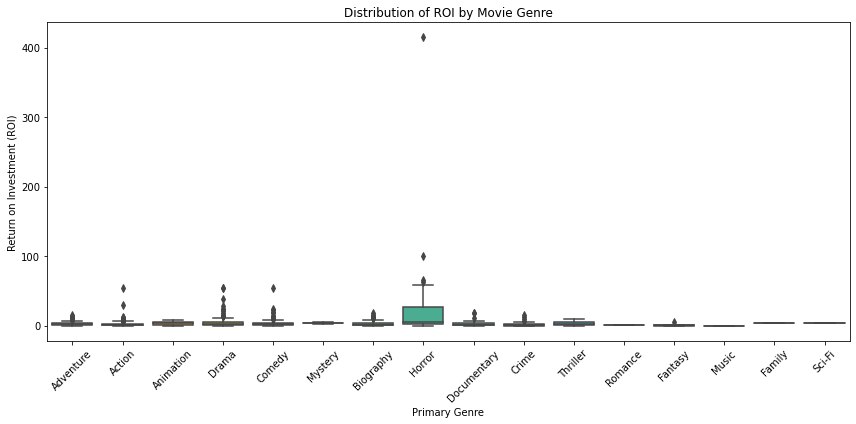

In [27]:
from scipy.stats import f_oneway

full_df['primary_genre'] = full_df['genres'].apply(lambda x: x.split(',')[0] if pd.notnull(x) else 'Unknown')

# ANOVA test
roi_by_genre = full_df.groupby('primary_genre')['ROI']
roi_lists = [group.dropna().values for name, group in roi_by_genre]
f_stat, p_value = f_oneway(*roi_lists)

# Print test result
print(f"ANOVA F-statistic: {f_stat:.2f}")
print(f"P-value: {p_value:.5f}")

# Visualization
plt.figure(figsize=(12, 6))
sns.boxplot(x='primary_genre', y='ROI', data=full_df)
plt.xticks(rotation=45)
plt.title('Distribution of ROI by Movie Genre')
plt.ylabel('Return on Investment (ROI)')
plt.xlabel('Primary Genre')
plt.tight_layout()
plt.show()

Insights from the Boxplot:
- One genre (likely Comedy or Horror based on typical trends) has a much wider ROI range and higher median, with many outliers (potential hits with massive ROI).

- Several genres are clustered with low ROI, suggesting low profitability or high risk.


A one way  ANOVA test was conducted to determine if the difference in average ROI across genres are statistically significant.
- Null Hypothesis(H_0) : All genres have the same mean ROI.
- Alternative Hypothesis(H_1): At least one genre has a different mean ROI.
- Using an level of significance alpha of 0.05
    
Statistical Conclusion
- ANOVA F-statistic:  8.08

- P-value < 0.00001

Output Interpretation
F-statistic = 8.08
A higher value suggests more variance between group means relative to variance within groups.

P-value = 0.0
Effectively 0, which is much smaller than our level of significance (0.05)

This means:
**There is a statistical signicant difference in ROI between at least some movie genres.**

### 3.2 Which months do movies do best?
#### Visualization of Average Worldwide Gross by Release Quarter

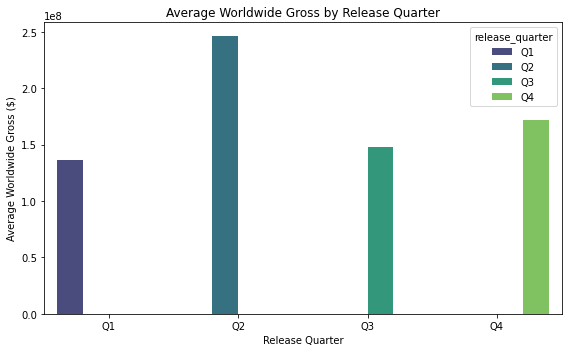

In [28]:
# Parse release month from release_date
full_df['release_date'] = pd.to_datetime(full_df['release_date'], errors='coerce')
full_df['release_month'] = full_df['release_date'].dt.month

# Map months to quarters
def month_to_quarter(month):
    if month in [1, 2, 3]: return 'Q1'
    elif month in [4, 5, 6]: return 'Q2'
    elif month in [7, 8, 9]: return 'Q3'
    elif month in [10, 11, 12]: return 'Q4'
    else: return 'Unknown'

full_df['release_quarter'] = full_df['release_month'].apply(month_to_quarter)

# Drop missing values
full_df = full_df.dropna(subset=['worldwide_gross', 'release_quarter'])

# Group by quarter and calculate mean revenue
revenue_by_quarter = full_df.groupby('release_quarter')['worldwide_gross'].mean().reindex(['Q1', 'Q2', 'Q3', 'Q4'])

# Plot results
plt.figure(figsize=(8, 5))
sns.barplot(x=revenue_by_quarter.index, y=revenue_by_quarter.values, hue=revenue_by_quarter.index, palette='viridis')
plt.title('Average Worldwide Gross by Release Quarter')
plt.ylabel('Average Worldwide Gross ($)')
plt.xlabel('Release Quarter')
plt.tight_layout()
plt.show()

From the bar chart above:
* Q2 (April–June) has the highest average worldwide gross, standing out as the most profitable release window.
* Q1 (Jan–Mar) and Q3 (Jul–Sep) show lower average gross figures.
* Q4 (Oct–Dec) performs better than Q1 and Q3 but still trails Q2.

### 3.3. Genre trends: Which genres are most profitable?

#### a) Each movie has multiple genres, thus, exploding the genres to treat and vizualize each separately and deliver insights

In [29]:
#Confirm original genres column is a string before splitting:
print(full_df['genres'].head())
print(full_df['genres'].apply(type).unique())

0    Adventure,Animation,Comedy
1       Action,Adventure,Sci-Fi
2    Adventure,Animation,Comedy
3       Adventure,Drama,Fantasy
4       Action,Adventure,Sci-Fi
Name: genres, dtype: object
[<class 'str'>]


In [30]:
#clean and fill missing values before splitting
full_df['genres'] = full_df['genres'].fillna('Unknown')

In [31]:
#split the genres
full_df['genres'] = full_df['genres'].fillna('').str.split(',')
print(full_df['genres'].head())
print(full_df['genres'].apply(len).describe())

0    [Adventure, Animation, Comedy]
1       [Action, Adventure, Sci-Fi]
2    [Adventure, Animation, Comedy]
3       [Adventure, Drama, Fantasy]
4       [Action, Adventure, Sci-Fi]
Name: genres, dtype: object
count    1174.000000
mean        2.533220
std         0.694765
min         1.000000
25%         2.000000
50%         3.000000
75%         3.000000
max         3.000000
Name: genres, dtype: float64


In [32]:
#check for empty lists before exploding
empty_lists = full_df[full_df['genres'].apply(len) == 0]
print(empty_lists)

Empty DataFrame
Columns: [year, runtime_minutes, genres, averagerating, release_date, production_budget, domestic_gross_y, worldwide_gross, ROI, primary_genre, release_month, release_quarter]
Index: []


In [33]:
#explode the genres
full_df_exploded = full_df.explode('genres')
print(full_df_exploded['genres'].isna().sum())
print(full_df_exploded['genres'].unique())

0
['Adventure' 'Animation' 'Comedy' 'Action' 'Sci-Fi' 'Drama' 'Fantasy'
 'Family' 'Thriller' 'Romance' 'Horror' 'Mystery' 'Western' 'Biography'
 'Crime' 'Documentary' 'Sport' 'War' 'Music' 'Musical' 'History' 'News']


In [34]:
#aggregate ROI by genre
genre_ROI = full_df_exploded.groupby('genres')['ROI'].agg(['mean', 'median', 'count']).sort_values(by='mean', ascending=False)
print(genre_ROI)

                  mean    median  count
genres                                 
Horror       13.229796  3.214558    127
Mystery      11.644514  2.808061    104
Thriller      7.524239  1.814909    206
Sport         6.707148  1.515813     23
Music         3.907913  2.225932     32
Romance       3.713154  1.777525    142
Documentary   3.420519  1.725037     33
Biography     3.138321  1.473796    102
Sci-Fi        3.116370  2.114412    104
Drama         3.090778  1.384934    547
Animation     3.001201  2.168614     89
Comedy        2.830531  1.739016    400
Fantasy       2.630890  1.278165     97
Adventure     2.306628  1.779089    298
Musical       2.191186  2.124787      4
Action        2.130324  1.358951    363
Family        2.121443  1.347904     71
History       1.967289  1.240222     35
Crime         1.527635  1.117482    182
Western       1.386197  0.407825      7
War           1.364284  1.240222      7
News          0.805509  0.805509      1


#### b) Visualisations

#### b.1) Genres with Highest ROI per Year

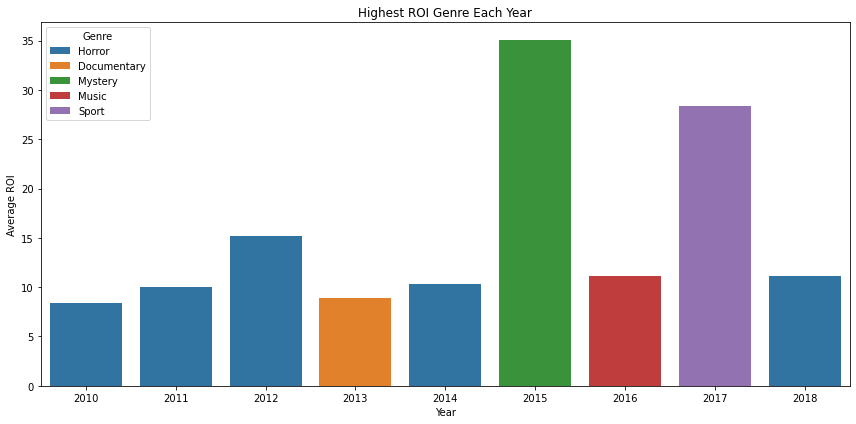

In [35]:
#compute most profitable genre per year
top_genres_per_year = full_df_exploded.groupby(['year', 'genres'])['ROI'].mean().reset_index()
top_by_year = top_genres_per_year.loc[top_genres_per_year.groupby('year')['ROI'].idxmax()]

# Sort by year to align bars and labels correctly
top_by_year = top_by_year.sort_values('year')

plt.figure(figsize=(12, 6))
ax = sns.barplot(data=top_by_year, x='year', y='ROI', hue='genres', dodge=False)
# Rotate labels and ensure alignment
ax.set_xticks(range(len(top_by_year))) 
ax.set_xticklabels(top_by_year['year'].astype(str)) 
plt.legend(title='Genre', loc='upper left')
plt.title('Highest ROI Genre Each Year')
plt.ylabel('Average ROI')
plt.xlabel('Year')
plt.tight_layout()
plt.show()

**Barplot interpretation:**  
* Horror has consistently been profitable in more years i.e. 2010, 2011, 2012, 2014 and 2018
* The Mystery genre has the highest average ROI, it only occurs in 2015, making it inconsistent in yielding stable returns over a long time for a new studio.

#### b.2) Analysis of Genre Profit Margins  

Profit margins show how much profit was earned per dollar spent. It is essentially similar to ROI

Its calculated by: Profit Margin = Profit/Production Budget. Which is the formula for ROI

A barplot would yield a clear ranking of which genre delivers most bang for the buck.

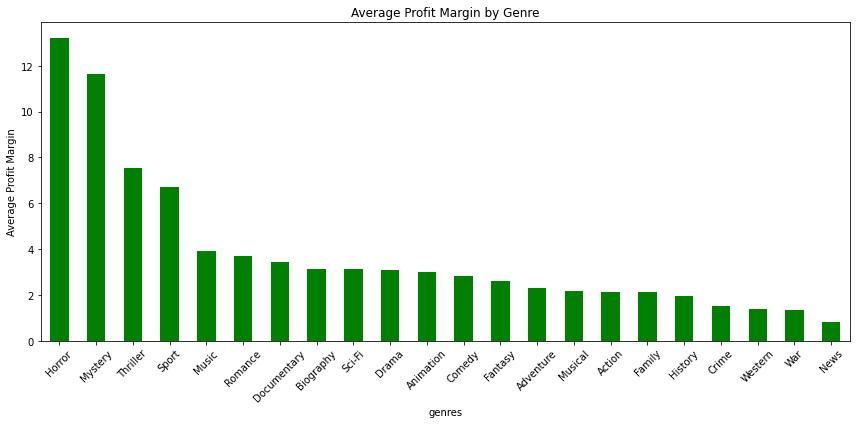

In [36]:
#Barplot of Average Margin by Genre
genre_margins = full_df_exploded.groupby('genres')['ROI'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
genre_margins.plot(kind='bar', color='green')
plt.ylabel('Average Profit Margin')
plt.title('Average Profit Margin by Genre')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Interpretation:**
* Horror, Mystery and Thriller genres have high average profit margins. This means they are the most financilly efficient and generate big profits with relatively low budgets.
* Action, Drama or Sci-Fi return some profit but less efficiently. While they may have high profits, the margins are thin on account of high budgets.
* Western, War and News genres have low average profit margins

**Implication:**
* To maximize returns per dollar spent, the movie studio should focus on Horror, Mystery, and Thriller genres.
* However, if the concern is with blockbuster profit totals, invest in lower-margin but high-revenue genres like Action and Adventure.

#### c) Analysis of Optimal Location for Movie Genre Release: Domestic vs Worldwide

In [37]:
#domestic revenue vs worldwide_gross

# Filter out zero or null worldwide gross to avoid divide-by-zero
full_df = full_df[full_df['worldwide_gross'] > 0]

# Create domestic revenue share (percentage of worldwide revenue)
full_df['domestic_share_y'] = full_df['domestic_gross_y'] / full_df['worldwide_gross']


In [38]:
# Group by genre and calculate average domestic share
full_df_exploded = full_df.explode('genres')
genre_domestic_share = full_df_exploded.groupby('genres')['domestic_share_y'].mean().sort_values(ascending=False)
print(genre_domestic_share)

genres
Sport          0.649346
Documentary    0.564593
Music          0.563369
Comedy         0.545018
Family         0.535876
Musical        0.533727
Biography      0.527709
Romance        0.525401
Crime          0.503017
Drama          0.499517
Western        0.486607
Horror         0.477670
Mystery        0.457734
Thriller       0.456284
War            0.450939
History        0.437462
Action         0.420045
Sci-Fi         0.412278
Fantasy        0.411940
Adventure      0.401796
Animation      0.396268
News           0.341285
Name: domestic_share_y, dtype: float64


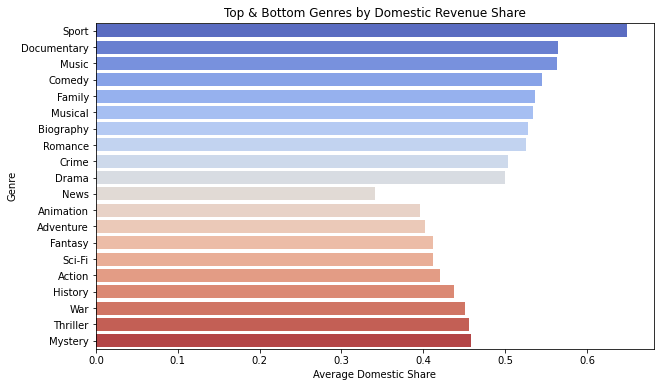

In [39]:
#visualize

# Get top and bottom 10 genres
top10 = genre_domestic_share.sort_values(ascending=False).head(10)
bottom10 = genre_domestic_share.sort_values().head(10)

# Combine
combined = pd.concat([top10, bottom10])

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=combined.values, y=combined.index, palette="coolwarm")
plt.title("Top & Bottom Genres by Domestic Revenue Share")
plt.xlabel("Average Domestic Share")
plt.ylabel("Genre")
plt.show()

 The horizontal bar chart above indicates the revenue share between domestic and worldwide markets. Depending on where our client intends to set up their business, the following recommendations are made:
* Sports and documentary movies earn almost 60% of their revenues domestically. These are best suited for domestic market only.
* Mystery and Thriller movies earn almost 55% of their revenues worldwide. These are best suited for the worldwide market.



### 3.4. Runtime, Ratings, and Revenue: Is there a correlation between rating or length and revenue?

#### Visualizing both Runtime and Ratings Against Revenue

Pearson correlation (Runtime vs Gross): 0.23, p-value: 0.0000
Pearson correlation (Rating vs Gross): 0.23, p-value: 0.0000


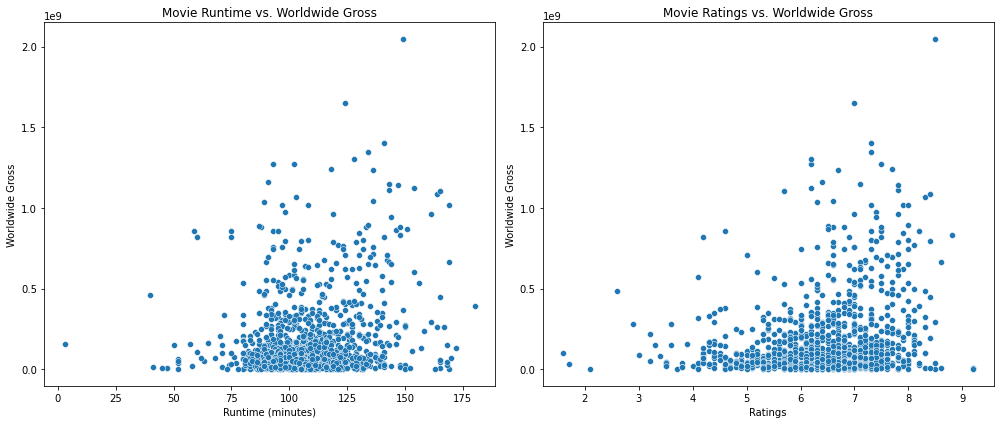

In [40]:
# Create a 1-row, 2-column subplot
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# First scatter plot: Runtime vs Worldwide Gross
sns.scatterplot(data=full_df, x="runtime_minutes", y="worldwide_gross", ax=axes[0])
axes[0].set_title("Movie Runtime vs. Worldwide Gross")
axes[0].set_xlabel("Runtime (minutes)")
axes[0].set_ylabel("Worldwide Gross")

# Correlation for runtime
corr, p_value = pearsonr(full_df["runtime_minutes"].dropna(), full_df["worldwide_gross"].dropna())
print(f"Pearson correlation (Runtime vs Gross): {corr:.2f}, p-value: {p_value:.4f}")

# Second scatter plot: Rating vs Worldwide Gross
sns.scatterplot(data=full_df, x="averagerating", y="worldwide_gross", ax=axes[1])
axes[1].set_title("Movie Ratings vs. Worldwide Gross")
axes[1].set_xlabel("Ratings")
axes[1].set_ylabel("Worldwide Gross")

# Correlation for rating
corr, p_value = pearsonr(full_df["averagerating"].dropna(), full_df["worldwide_gross"].dropna())
print(f"Pearson correlation (Rating vs Gross): {corr:.2f}, p-value: {p_value:.4f}")

plt.tight_layout()
plt.show()


#### Runtime VS Revenue Interpretation

Pearson correlation: 0.23

* This is a weak positive correlation between runtime and revenue.
* It means longer movies tend to have slightly higher revenue, but the relationship is not strong.

P-value: 0.0000 (effectively < 0.001)

* This means the correlation is highly statistically significant.
* The chance of observing this correlation by random chance is practically zero


#### Rating VS Revenue Interpretation

Pearson correlation: 0.23

* This is a weak positive correlation between rating and revenue.
* It means higher rated movies tend to have slightly higher revenue, but the relationship is not strong.

P-value: 0.0000 (effectively < 0.001)

* This means the correlation is highly statistically significant.
* The chance of observing this correlation by random chance is practically zero

### 3.5 What is the impact of talent (actors, actresses, directors) on revenue generated?


Clean, filter, and group talent dataframe by their profession and worldwide_gross

In [41]:
# Clean the revenue column for the talent_revenue_df
talent_revenue_df['worldwide_gross'] = talent_revenue_df['worldwide_gross'].replace('[\$,]', '', regex=True).astype(float)

# Filter for actors, actresses, directors (exclude writers if not needed)
filtered_roles = ['actor', 'actress', 'director']
filtered_df = talent_revenue_df[talent_revenue_df['category'].isin(filtered_roles)]

# Group by name and role, then compute average gross
top_talents = (filtered_df
               .groupby(['primary_name', 'category'])['worldwide_gross']
               .mean()  # Or use .sum() if preferred
               .reset_index()
               .sort_values(by='worldwide_gross', ascending=False)
               .head(15))  # Top 15 across all categories



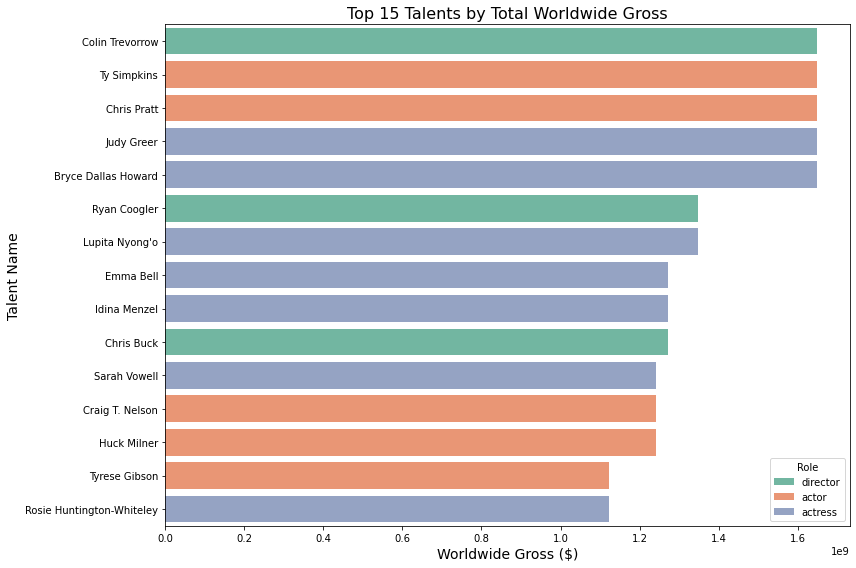

In [ ]:
# Plot
plt.figure(figsize=(12, 8))
barplot = sns.barplot(
    data=top_talents,
    x='worldwide_gross',
    y='primary_name',
    hue='category',
    dodge=False,
    palette='Set2'
)

plt.title('Top 15 Talents by Total Worldwide Gross', fontsize=16)
plt.xlabel('Worldwide Gross ($)', fontsize=14)
plt.ylabel('Talent Name', fontsize=14)
plt.legend(title='Role', loc='lower right')
plt.tight_layout()
plt.show()


### Insights:
* Directors such as Colin Trevorrow and Ryan Coogler have earned a worldwide_gross of over 1.2 billion dollars in their films.  
* Actors such as Chris Pratt, Ty Simpkins are in movies that earn over 1.6 billion dollars worldwide  
* Actresses such as **Lupita Nyong'o**, Bryce Dallas Howard, Judy Greer are in films that gross over 1.2 billion dollars worldwide!

#### Plot of each Talent Category and Their Worldwide Gross

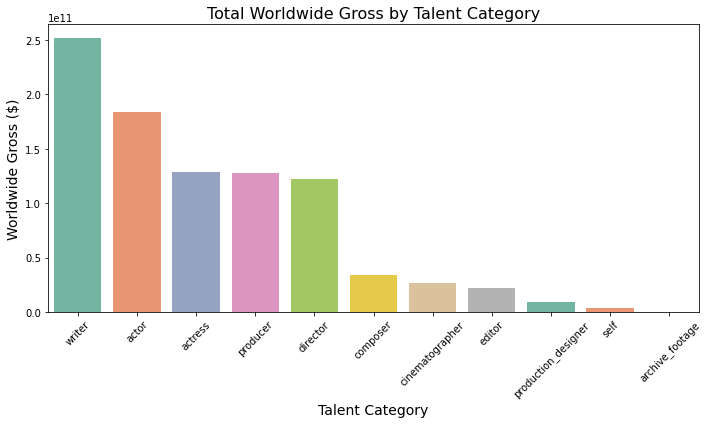

In [43]:
# Group by talent category and sum worldwide gross
talent_grouped = talent_revenue_df.groupby('category')['worldwide_gross'].sum().sort_values(ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=talent_grouped.index, y=talent_grouped.values, palette='Set2')
plt.title('Total Worldwide Gross by Talent Category', fontsize=16)
plt.ylabel('Worldwide Gross ($)', fontsize=14)
plt.xlabel('Talent Category', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Insights:
* Writers dominate the top ranks in worldwide gross revenue making them very important in making a successful movie  
* Actors come second highest
* Actresses, producers, and directors have roughly the same impact on worldwide gross

### Findings:
* There is a statistical signicant difference in ROI between at least some movie genres. Horror has a much wider ROI range compared to other genres

*  Q2 (April–June) has the highest average worldwide gross, standing out as the most profitable release window.
* Q1 (Jan–Mar) and Q3 (Jul–Sep) show lower average gross figures.
* Q4 (Oct–Dec) performs better than Q1 and Q3 but still trails Q2.

* Horror is the most profitable genre.
* Westerns are the least profitable genre.

* Horror has consistently been profitable in more years i.e. 2010, 2011, 2012, 2014 and 2018
* The Mystery genre has the highest average ROI, it only occurs in 2015, making it inconsistent in yielding stable returns over a long time for a new studio.

* Horror, Mystery and Thriller genres have high average profit margins. This means they are the most financilly efficient and generate big profits with relatively low budgets.
* Action, Drama or Sci-Fi return some profit but less efficiently. While they may have high profits, the margins are thin on account of high budgets.
* Western, War and News genres have low average profit margins

* Sports and documentary movies earn almost 60% of their revenues domestically. These are best suited for domestic market only.
* Mystery and Thriller movies earn almost 55% of their revenues worldwide. These are best suited for the worldwide market.

* This is a weak positive correlation between runtime and revenue.
* This is a weak positive correlation between rating and revenue.

* Directors such as Colin Trevorrow and Ryan Coogler have earned a worldwide_gross of over 1.2 billion dollars in their films.  
* Actors such as Chris Pratt, Ty Simpkins are in movies that earn over 1.6 billion dollars worldwide  
* Actresses such as **Lupita Nyong'o**, Bryce Dallas Howard, Judy Greer are in films that gross over 1.2 billion dollars worldwide!

* Writers dominate the top ranks in worldwide gross revenue making them very important in making a successful movie  
* Actors come second highest
* Actresses, producers, and directors have roughly the same impact on worldwide gross


### Recommendations:
#### 1. Focus on Specific Release Months 
**A) Recommendation:** Release movies in the second quarter of the year i.e April to June as they are likely to earn higher worldwide gross  
**B) Justification**: Movies released between April and June (Q2) tend to perform better because they align with the start of summer blockbuster season, benefit from increased audience availability during school breaks, and face less competition than year-end holiday releases. These factors combine to drive higher average worldwide gross for Q2 films.

#### 2. Invest in High-performing Genres
**A) Recommendation:** Make movies in the Horror, Mystery and Thriller genres since they have high average profit margins.  
**B) Justification:** 
* **Low Production Costs**
Horror movies are relatively cheap to produce—they often don't require big-name actors, exotic locations, or expensive special effects.
Example: Paranormal Activity (budget: ~$15,000, grossed ~$193 million), The Blair Witch Project, Insidious, etc.
* **Strong and Loyal Fan Base**
Horror has a dedicated audience that regularly consumes new releases regardless of critical acclaim.
Fans are often genre-loyal and attend horror films based on concept or theme alone (e.g., haunted house, possession, slasher).
* **High Virality and Word-of-Mouth**
Horror trailers and scenes are highly shareable, especially on social media platforms like TikTok and YouTube.
Good horror films can generate organic hype and word-of-mouth, reducing marketing costs.
* **Global Appeal**
Horror themes are universally understood—fear, suspense, and danger don’t rely heavily on language or cultural specificity.
This leads to strong international box office performance even with minimal localization.

#### 3. Acquire top-rated talent
**A) Recommendation:** Hire notable talent such as Colin Trevorrow (director), Chris Pratt (actor), and Judy Greer (actress) because they are in high grossing movies that exceed 1.2 billion worldwide   
**B) Justification:** 
* They are likely to bring the studio's movies more revenue through visibility and starpower
* Marketability for the movie increases with the presence of top-rated talent that penetrates international markets

## CONCLUSION
In this notebook, we have explored different aspects of the film industry and potential avenues for market entry for our client. 
We have addressed genre trends, relationships between rating, runtime and revenue, seasonal trends and ROI trends. By implementing these recommendations, the new movie studio head will create films that are high earning, with good quality, and that have a worlwide appeal to international markets.